In [1]:
import modin.pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets
import variables
import functions

In [2]:
@ipywidgets.interact
def setState(state=variables.states):
    variables.selected_state = state

interactive(children=(Dropdown(description='state', options=('Aguascalientes', 'Baja California', 'Baja Califo…

In [3]:
@ipywidgets.interact
def setLevel(level=variables.levels):
    variables.selected_level = level

interactive(children=(Dropdown(description='level', options=('Menos de 1 s.m.', '1 salario m¡nimo', 'M s de 2 …

In [4]:
@ipywidgets.interact
def setLevel(genre=variables.genres):
    variables.selected_genre = genre

interactive(children=(Dropdown(description='genre', options=('Hombre', 'Mujer'), value='Hombre'), Output()), _…

In [5]:
@ipywidgets.interact
def setLevel(year=variables.years):
    variables.selected_year = year

interactive(children=(Dropdown(description='year', options=(2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 20…

## Variables

In [57]:
variables.selected_state

'Jalisco'

In [58]:
variables.selected_level

'M s de 10 s.m.'

In [59]:
variables.selected_genre

'Hombre'

In [60]:
variables.selected_year

2005

## Read Data

In [61]:
df = pd.read_csv(variables.file, encoding='ISO-8859-1')
df

,Periodo,Entidad_Federativa,Sexo,Grupo_edad,Nivel_ingreso,Numero_personas
0,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284
1,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,1 salario m¡nimo,179
2,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 2 hasta 3 s.m.,10503
3,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 3 hasta 5 s.m.,16803
4,20050301,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 5 hasta 10 s.m.,1955
...,...,...,...,...,...,...
225721,20190601,Zacatecas,Mujer,45 A 64 A¥OS,No recibe ingresos,136
225722,20190601,Zacatecas,Mujer,45 A 64 A¥OS,No especificado,561
225723,20190601,Zacatecas,Mujer,65 A¥OS Y MAS,Menos de 1 s.m.,1521
225724,20190601,Zacatecas,Mujer,65 A¥OS Y MAS,M s de 3 hasta 5 s.m.,1281


# Change date format

In [62]:
df.insert(0, 'year', 0, True)
df.insert(1, 'month', 0, True)
df.insert(2, 'day', 0, True)
df['year'] = df['Periodo'].astype(str).str.slice(start=0, stop=4)
df['month'] = df['Periodo'].astype(str).str.slice(start=4, stop=6)
df['day'] = df['Periodo'].astype(str).str.slice(start=6, stop=8)
df.insert(0, 'date', df['year'] + '-' + df['month'] + '-' + df['day'])
df.drop(columns='Periodo', inplace=True)

# Cleaning the area

In [63]:
df.rename(columns={'Entidad_Federativa': 'state', 'Sexo': 'sex', 'Grupo_edad': 'age_range', 'Nivel_ingreso': 'level', 'Numero_personas': 'num_people'}, inplace=True)
df = df.dropna();
df

,date,year,month,day,state,sex,age_range,level,num_people
0,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,4284
1,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,1 salario m¡nimo,179
2,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 2 hasta 3 s.m.,10503
3,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 3 hasta 5 s.m.,16803
4,2005-03-01,2005,03,01,Aguascalientes,Hombre,15 A 24 A¥OS,M s de 5 hasta 10 s.m.,1955
...,...,...,...,...,...,...,...,...,...
225721,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No recibe ingresos,136
225722,2019-06-01,2019,06,01,Zacatecas,Mujer,45 A 64 A¥OS,No especificado,561
225723,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,Menos de 1 s.m.,1521
225724,2019-06-01,2019,06,01,Zacatecas,Mujer,65 A¥OS Y MAS,M s de 3 hasta 5 s.m.,1281


## Filters

In [64]:
less_minimum_salary_filter = df['level'] == variables.less_than_minimum_salary
man_filter = df['sex'] == variables.man
state_filter = df['state'] == variables.selected_state
from_15_to_24_filter = df['age_range'] == variables.from_15_to_24

## Less salary minimum man

In [65]:
less_salary_minimum_man = df.where(less_minimum_salary_filter & man_filter & state_filter & from_15_to_24_filter)
less_salary_minimum_man.dropna(inplace=True)
less_salary_minimum_man

,date,year,month,day,state,sex,age_range,level,num_people
844,2005-03-01,2005,03,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,49188.0
4746,2005-06-01,2005,06,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,50514.0
8634,2005-09-01,2005,09,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,63344.0
12523,2005-12-01,2005,12,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,57247.0
16407,2006-03-01,2006,03,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,49458.0
20320,2006-06-01,2006,06,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,59239.0
24200,2006-09-01,2006,09,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,53811.0
28135,2006-12-01,2006,12,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,43024.0
32059,2007-03-01,2007,03,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,44560.0
35965,2007-06-01,2007,06,01,Jalisco,Hombre,15 A 24 A¥OS,Menos de 1 s.m.,51470.0


In [66]:
less_salary_minimum_man = less_salary_minimum_man.drop(columns=['month', 'day', 'state', 'sex', 'age_range', 'level', 'date'])
less_salary_minimum_man

,year,num_people
844,2005,49188.0
4746,2005,50514.0
8634,2005,63344.0
12523,2005,57247.0
16407,2006,49458.0
20320,2006,59239.0
24200,2006,53811.0
28135,2006,43024.0
32059,2007,44560.0
35965,2007,51470.0


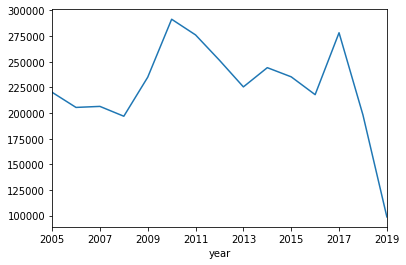

In [67]:
result_less_salary_minimum_man = less_salary_minimum_man.groupby('year').sum()
result_less_salary_minimum_man = result_less_salary_minimum_man.astype(int)

functions.save_image(
    df = result_less_salary_minimum_man['num_people'], 
    image_name = 'less_salary_minimum_man_char_line'
)

In [68]:
result_less_salary_minimum_man

,num_people
year,
2005,220293
2006,205532
2007,206534
2008,196944
2009,234992
2010,291441
2011,276171
2012,251462
2013,225533


# Less salary minimum woman

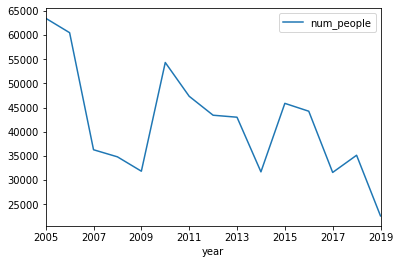

In [69]:
woman_filter = df['sex'] == variables.woman
less_salary_minimum_woman = df.where(less_minimum_salary_filter & woman_filter & state_filter & from_15_to_24_filter)
less_salary_minimum_woman = less_salary_minimum_woman.dropna()
result_less_salary_minimum_woman = less_salary_minimum_woman.groupby('year').sum()

functions.save_image(
    df = result_less_salary_minimum_woman, 
    image_name = 'less_salary_minimum_woman_char_line'
)

In [70]:
result_less_salary_minimum_woman

,num_people
year,
2005,63466.0
2006,60476.0
2007,36263.0
2008,34794.0
2009,31824.0
2010,54309.0
2011,47323.0
2012,43404.0
2013,42992.0


## compare man and woman

In [71]:
total_less_salary_minimum_woman = result_less_salary_minimum_woman.sum()
total_less_salary_minimum_man = result_less_salary_minimum_man.sum()

bar_chart_less_salary_minimum = pd.Series(
    [
        total_less_salary_minimum_man['num_people'], 
        total_less_salary_minimum_woman['num_people']
    ], 
    index =[variables.man, variables.woman],
    name = 'values'
) 

In [72]:
@ipywidgets.interact
def plot(color=['red','steelblue']):
         (sns.barplot(y='values',
             x=[variables.man, variables.woman],
             data=df_bar_chart_less_salary_minimum,
            #orient='h',
             color=color)
 .set_title('{} menos de un salario minimo '.format(variables.selected_state)))

interactive(children=(Dropdown(description='color', options=('red', 'steelblue'), value='red'), Output()), _do…

In [38]:
df_bar_chart_less_salary_minimum = bar_chart_less_salary_minimum.to_frame()
df_bar_chart_less_salary_minimum.reindex
df_bar_chart_less_salary_minimum.reset_index()
#df_bar_chart_less_salary_minimum.rename(columns={'index': 'genre'})

,index,values
0,Hombre,495597.0
1,Mujer,49883.0
